In [11]:
%matplotlib inline
import sympy as sym
import pylab as pl
import numpy as np

# Mindflow

We want the best approximation of function $f$, on the space $V = \mathrm{span}\{v_i\}$. Remeber that $p\in V$ is best approximation of $f$ if and only if:

$$
(p-f,q)=0, \quad \forall q\in V.
$$

Focus one second on the fact that both $p$ and $q$ belong to $V$. We know that any $q$ can be expressed as a linear combination of the basis functions $v_i$:

$$
(p-f,v_i)=0, \quad \forall v_i\in V.
$$

Moreover $p$ is uniquely defined by the cofficents $p^j$ such that $p = p^j\,v_j$. Collecting this information together we get:

$$
(v_j,v_i) p_j = (f,v_i),\quad \forall v_i\in V.
$$

Now that we know our goal (finiding these $p^j$ coefficents) we do what the rangers do: we explore!

We understaind that we will need to invert the matrix:

$$
M_{ij} = (v_j,v_i) = \int v_i\cdot v_j
$$

What happens if we choose basis functions such that $(v_j,v_i) =  \delta_{ij}$?

How to construct numerical techniques to evaluate integrals in an efficent way?

Evaluate the $L^2$ projection.

## Orthogonal Polynomials

$p_0(x) = 0$

$$
p_k(x) = x^k - \sum_{j=0}^{k-1} \frac{(x^k,p_j(x))}{(p_j(x),p_j(x))}
$$

In [12]:
def scalar_prod(p0,p1):
    return sym.integrate(p0*p1,(t,0,1))

In [13]:
t = sym.symbols('t')
k = 3

Pk = [1]

for k in xrange(1,5):
    s = 0
    for j in xrange(0,k):
        s+= scalar_prod(t**k,Pk[j])/scalar_prod(Pk[j],Pk[j])*Pk[j]
    pk = t**k-s
    pk = pk/sym.sqrt(scalar_prod(pk,pk))
    Pk.append(pk)


Mij = []
for i in xrange(len(Pk)):
    row = []
    for j in xrange(len(Pk)):
        row.append(scalar_prod(Pk[i],Pk[j]))
    Mij.append(row)

Mij = sym.Matrix(Mij)
Mij

Matrix([
[1, 0, 0, 0, 0],
[0, 1, 0, 0, 0],
[0, 0, 1, 0, 0],
[0, 0, 0, 1, 0],
[0, 0, 0, 0, 1]])

## Legendre Polynomial

$$
(n+1) P^{n+1}(x) = (2n+1)\, x\, P^n(x) - n\, P^{n-1}(x)
$$

[1.0, t, 1.5*t**2 - 0.5, t*(2.5*t**2 - 1.5), 4.375*t**4 - 3.75*t**2 + 0.375, t*(7.875*t**4 - 8.75*t**2 + 1.875), 14.4375*t**6 - 19.6875*t**4 + 6.5625*t**2 - 0.3125, t*(26.8125*t**6 - 43.3125*t**4 + 19.6875*t**2 - 2.1875), 50.2734375*t**8 - 93.84375*t**6 + 54.140625*t**4 - 9.84375*t**2 + 0.2734375]


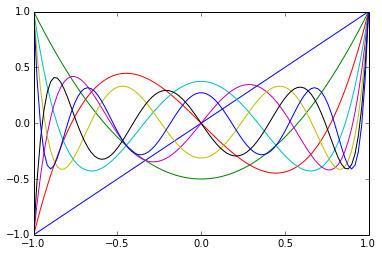

In [17]:
Pn = [1.,t]

#Pn = [1.,x, ((2*n+1)*x*Pn[n] - n*Pn[n-1])/(n+1.) for n in range(1,2)]

for n in range(1,8):
    pn1 = ((2*n+1)*t*Pn[n] - n*Pn[n-1])/(n+1.)
    Pn.append(sym.simplify(pn1))
    
print Pn

x = np.linspace(-1,1,100)

for p in Pn:
    if p != 1. :
        fs = sym.lambdify(t, p, 'numpy')
        #print x.shape
        #print fs(x)
        _ = pl.plot(x,fs(x))
